In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["savefig.bbox"] = "tight"
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [2]:
from keras.datasets import mnist
import keras

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


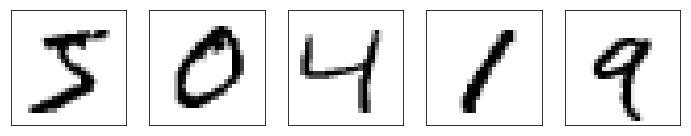

In [33]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_train[i, :, :], cmap='gray_r')
    ax.set_xticks(())
    ax.set_yticks(())
plt.savefig("images/mnist_org.png")

In [34]:
rng = np.random.RandomState(42)
perm = rng.permutation(28 * 28)

In [35]:
perm

array([598, 590, 209, 637, 174, 213, 429, 259, 593, 204, 576, 244, 235,
       218, 770, 155, 516,  67, 579, 109,  66, 522,  78, 473,  23, 211,
       706, 445, 644,  39, 332,  86, 137, 653, 656, 442, 525, 515, 334,
       630, 342, 780, 118, 652, 260, 779, 352, 432,  77, 691, 483, 682,
        49, 518, 168, 326, 377, 375, 568, 309, 629,  30, 361,  33,  31,
       627, 558, 405, 254, 412, 739, 486, 266, 331, 422, 231, 333, 357,
       620, 265,  54, 735, 514,  97, 506, 294, 234, 749, 311, 351, 120,
       436,  84,  10, 624, 464, 192, 530, 199,  29, 470, 323,  65, 350,
       659, 239,  81, 485, 291, 487, 264, 715, 535, 519,  76, 388, 523,
       570,  72, 693, 409, 208, 585,  63, 314, 672, 302, 750, 363, 393,
       752, 367, 705,   7, 533, 101, 428, 765, 745,   2, 398, 527, 764,
       196, 641, 729, 493, 448, 215, 425, 581, 417,  79, 148, 335, 247,
       559, 762, 133, 648,  55, 411, 597, 675, 545, 617, 720, 296, 362,
        60, 741, 360, 440, 662, 426, 383, 327, 584, 286,  90, 38

In [36]:
X_train.shape

(60000, 28, 28)

In [37]:
X_train_perm = X_train.reshape(-1, 28 * 28)[:, perm].reshape(-1, 28, 28)
X_test_perm = X_test.reshape(-1, 28 * 28)[:, perm].reshape(-1, 28, 28)

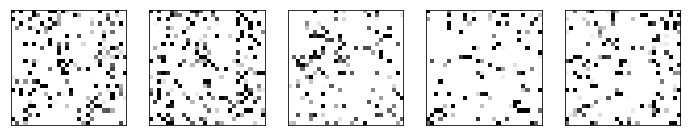

In [38]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_train_perm[i, :, :], cmap='gray_r')
    ax.set_xticks(())
    ax.set_yticks(())
plt.savefig("images/mnist_permuted.png")

# Densly connected networks

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_callback_dense = model.fit(X_train.reshape(-1, 28 * 28) / 255, y_train, batch_size=128,
                             epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 81us/step - loss: 0.2880 - acc: 0.9188 - val_loss: 0.1333 - val_acc: 0.9613
Epoch 2/10
54000/54000 [==============================] - 4s 78us/step - loss: 0.1194 - acc: 0.9644 - val_loss: 0.0994 - val_acc: 0.9715
Epoch 3/10
54000/54000 [==============================] - 5s 87us/step - loss: 0.0768 - acc: 0.9772 - val_loss: 0.0816 - val_acc: 0.9780
Epoch 4/10
54000/54000 [==============================] - 4s 76us/step - loss: 0.0542 - acc: 0.9840 - val_loss: 0.0721 - val_acc: 0.9797
Epoch 5/10
54000/54000 [==============================] - 4s 73us/step - loss: 0.0408 - acc: 0.9882 - val_loss: 0.0675 - val_acc: 0.9800
Epoch 6/10
54000/54000 [==============================] - 4s 79us/step - loss: 0.0303 - acc: 0.9918 - val_loss: 0.0674 - val_acc: 0.9817
Epoch 7/10
54000/54000 [==============================] - 4s 70us/step - loss: 0.0217 - acc: 0.9945 - val_loss: 0.0669 - val_acc:

In [40]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets

X_train_images = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) / 255
X_test_images = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1) / 255
input_shape = (img_rows, img_cols, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

num_classes = 10
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

In [39]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn = cnn.fit(X_train_images, y_train,
                      batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 32s 598us/step - loss: 0.0367 - acc: 0.9887 - val_loss: 0.0655 - val_acc: 0.9838
Epoch 2/10
54000/54000 [==============================] - 28s 522us/step - loss: 0.0256 - acc: 0.9914 - val_loss: 0.0597 - val_acc: 0.9855
Epoch 3/10
54000/54000 [==============================] - 27s 504us/step - loss: 0.0231 - acc: 0.9929 - val_loss: 0.0529 - val_acc: 0.9888
Epoch 4/10
54000/54000 [==============================] - 26s 489us/step - loss: 0.0190 - acc: 0.9938 - val_loss: 0.0665 - val_acc: 0.9863
Epoch 5/10
54000/54000 [==============================] - 27s 498us/step - loss: 0.0122 - acc: 0.9957 - val_loss: 0.0585 - val_acc: 0.9860
Epoch 6/10
54000/54000 [==============================] - 28s 520us/step - loss: 0.0144 - acc: 0.9953 - val_loss: 0.0704 - val_acc: 0.9852
Epoch 7/10
54000/54000 [==============================] - 27s 493us/step - loss: 0.0180 - acc: 0.9944 - val_loss: 0.0

In [41]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                51264     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total para

In [44]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    #df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    #plt.ylabel("loss")

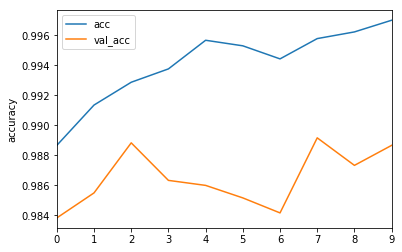

In [45]:
plot_history(history_cnn)

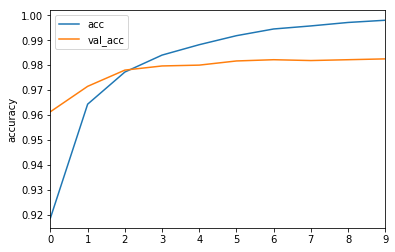

In [46]:
plot_history(history_callback_dense)

In [47]:
history_callback_dense_shuffle = model.fit(X_train_perm.reshape(-1, 28 * 28) / 255, y_train, batch_size=128,
                             epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 123us/step - loss: 0.2447 - acc: 0.9299 - val_loss: 0.0969 - val_acc: 0.9727
Epoch 2/10
54000/54000 [==============================] - 6s 103us/step - loss: 0.0884 - acc: 0.9736 - val_loss: 0.0857 - val_acc: 0.9765
Epoch 3/10
54000/54000 [==============================] - 5s 96us/step - loss: 0.0593 - acc: 0.9829 - val_loss: 0.0760 - val_acc: 0.9782
Epoch 4/10
54000/54000 [==============================] - 5s 97us/step - loss: 0.0430 - acc: 0.9879 - val_loss: 0.0693 - val_acc: 0.9802
Epoch 5/10
54000/54000 [==============================] - 6s 109us/step - loss: 0.0312 - acc: 0.9916 - val_loss: 0.0680 - val_acc: 0.9795
Epoch 6/10
54000/54000 [==============================] - 6s 112us/step - loss: 0.0237 - acc: 0.9939 - val_loss: 0.0679 - val_acc: 0.9795
Epoch 7/10
54000/54000 [==============================] - 6s 111us/step - loss: 0.0180 - acc: 0.9958 - val_loss: 0.0644 - val

In [49]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

X_train_images_perm = X_train_perm.reshape(X_train_perm.shape[0], img_rows, img_cols, 1) / 255
history_cnn_perm = cnn.fit(X_train_images_perm, y_train,
                           batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 28s 522us/step - loss: 0.9967 - acc: 0.6817 - val_loss: 0.3969 - val_acc: 0.8807
Epoch 2/10
54000/54000 [==============================] - 26s 490us/step - loss: 0.3973 - acc: 0.8775 - val_loss: 0.3066 - val_acc: 0.9085
Epoch 3/10
54000/54000 [==============================] - 29s 534us/step - loss: 0.3189 - acc: 0.9010 - val_loss: 0.2438 - val_acc: 0.9253
Epoch 4/10
54000/54000 [==============================] - 26s 473us/step - loss: 0.2736 - acc: 0.9157 - val_loss: 0.2111 - val_acc: 0.9400
Epoch 5/10
54000/54000 [==============================] - 28s 516us/step - loss: 0.2436 - acc: 0.9257 - val_loss: 0.2163 - val_acc: 0.9307
Epoch 6/10
54000/54000 [==============================] - 25s 465us/step - loss: 0.2244 - acc: 0.9313 - val_loss: 0.1826 - val_acc: 0.9413
Epoch 7/10
54000/54000 [==============================] - 28s 525us/step - loss: 0.2073 - acc: 0.9359 - val_loss: 0.1

In [82]:
cnn = pd.DataFrame(history_cnn.history)
dense = pd.DataFrame(history_callback_dense.history)
dense_perm = pd.DataFrame(history_callback_dense_shuffle.history)
cnn_perm = pd.DataFrame(history_cnn_perm.history)

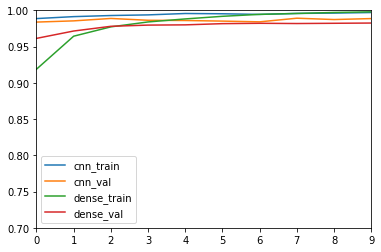

In [87]:
res_org = pd.DataFrame({'cnn_train': cnn.acc, 'cnn_val': cnn.val_acc, 'dense_train': dense.acc, 'dense_val': dense.val_acc})
res_org.plot()
plt.ylim(.7, 1)
plt.savefig("images/mnist_org_curve.png")

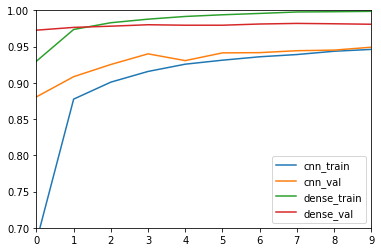

In [88]:
res_perm = pd.DataFrame({'cnn_train': cnn_perm.acc, 'cnn_val': cnn_perm.val_acc, 'dense_train': dense_perm.acc, 'dense_val': dense_perm.val_acc})
res_perm.plot()
plt.ylim(.7, 1)

plt.savefig("images/mnist_perm_curve.png")

In [68]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten
from keras.models import Model

num_classes = 10
inputs = Input(shape=(28, 28, 1))
conv1_1 = Conv2D(32, kernel_size=(3, 3),
                 activation='relu', padding='same')(inputs)
conv1_2 = Conv2D(32, kernel_size=(3, 3),
                 activation='relu', padding='same')(conv1_1)
conv1_3 = Conv2D(32, kernel_size=(3, 3),
                 activation='relu', padding='same')(conv1_2)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1_3)
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2_1)
conv2_3 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2_2)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2_3)
flat = Flatten()(maxpool2)
dense = Dense(64, activation='relu')(flat)
predictions = Dense(num_classes, activation='softmax')(dense)

model = Model(inputs=inputs, outputs=predictions)

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 14, 14, 32)        9248      
__________

In [70]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn_no_res = model.fit(X_train_images, y_train,
                       batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 207s 4ms/step - loss: 0.2616 - acc: 0.9251 - val_loss: 0.0519 - val_acc: 0.9848
Epoch 2/10
38912/54000 [====================>.........] - ETA: 1:01 - loss: 0.0566 - acc: 0.9817

KeyboardInterrupt: 

In [74]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, add
from keras.models import Model

num_classes = 10
inputs = Input(shape=(28, 28, 1))
conv1_1 = Conv2D(32, kernel_size=(3, 3),
                 activation='relu', padding='same')(inputs)
conv1_2 = Conv2D(32, kernel_size=(3, 3),
                 activation='relu', padding='same')(conv1_1)
conv1_3 = Conv2D(32, kernel_size=(3, 3),
                 activation='relu', padding='same')(conv1_2)
skip1 = add([conv1_1, conv1_3])
conv1_4 = Conv2D(32, kernel_size=(3, 3),
                 activation='relu', padding='same')(skip1)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1_4)
conv2_1 = Conv2D(32, (3, 3), activation='relu', padding='same')(maxpool1)
conv2_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2_1)
skip1 = add([maxpool1, conv2_2])
conv2_3 = Conv2D(32, (3, 3), activation='relu', padding='same')(skip1)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2_3)
flat = Flatten()(maxpool2)
dense = Dense(64, activation='relu')(flat)
predictions = Dense(num_classes, activation='softmax')(dense)

model = Model(inputs=inputs, outputs=predictions)
flat = Flatten()(maxpool2)
dense = Dense(64, activation='relu')(flat)
predictions = Dense(num_classes, activation='softmax')(dense)

model = Model(inputs=inputs, outputs=predictions)

In [75]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 28, 28, 32)   320         input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 28, 28, 32)   9248        conv2d_46[0][0]                  
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 28, 28, 32)   9248        conv2d_47[0][0]                  
__________________________________________________________________________________________________
add_8 (Add

In [76]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn_w_res = model.fit(X_train_images, y_train,
                       batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
20608/54000 [==========>...................] - ETA: 2:49 - loss: 12.7270 - acc: 0.2091

KeyboardInterrupt: 

In [79]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten
from keras.models import Model

num_classes = 10
inputs = Input(shape=(28, 28, 1))
conv1_1 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(inputs)
conv1_2 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv1_1)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1_2)
conv2_1 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(maxpool1)
conv2_2 = Conv2D(32, (3, 3), activation='relu',
                 padding='same')(conv2_1)
skip2 = add([maxpool1, conv2_2])
maxpool2 = MaxPooling2D(pool_size=(2, 2))(skip2)
flat = Flatten()(maxpool2)
dense = Dense(64, activation='relu')(flat)
predictions = Dense(num_classes, activation='softmax')(dense)

model = Model(inputs=inputs, outputs=predictions)

In [80]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 28, 28, 32)   320         input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 28, 28, 32)   9248        conv2d_57[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_23 (MaxPooling2D) (None, 14, 14, 32)   0           conv2d_58[0][0]                  
__________________________________________________________________________________________________
conv2d_59 

In [81]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn_w_res = model.fit(X_train_images, y_train,
                       batch_size=128, epochs=10, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 9344/54000 [====>.........................] - ETA: 1:40 - loss: 14.5057 - acc: 0.0997

KeyboardInterrupt: 